In [1]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
%matplotlib inline
import seaborn as sns
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [2]:
df=pd.read_csv('file:///F:/supermarket_sales%20-%20Sheet1.csv')
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [3]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [4]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

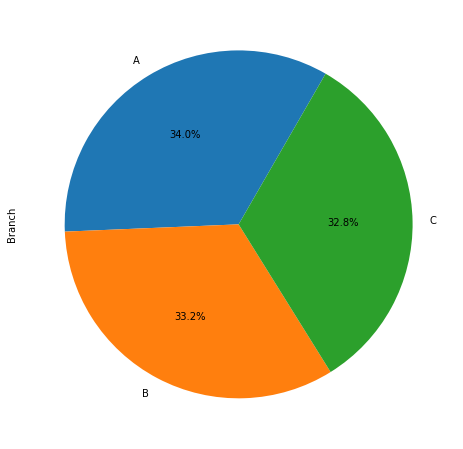

In [7]:
plt.figure(figsize=(8,8))
df['Branch'].value_counts().plot.pie(autopct='%1.1f%%',
                                      startangle=60)

In [9]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

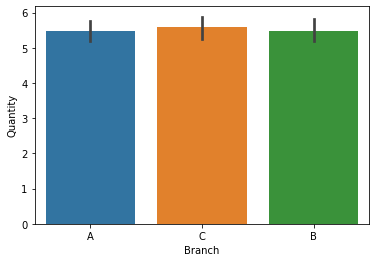

In [11]:
sns.barplot(x='Branch',y='Quantity',data=df)

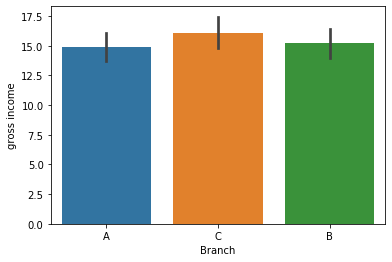

In [12]:
sns.barplot(x='Branch',y='gross income',data=df)

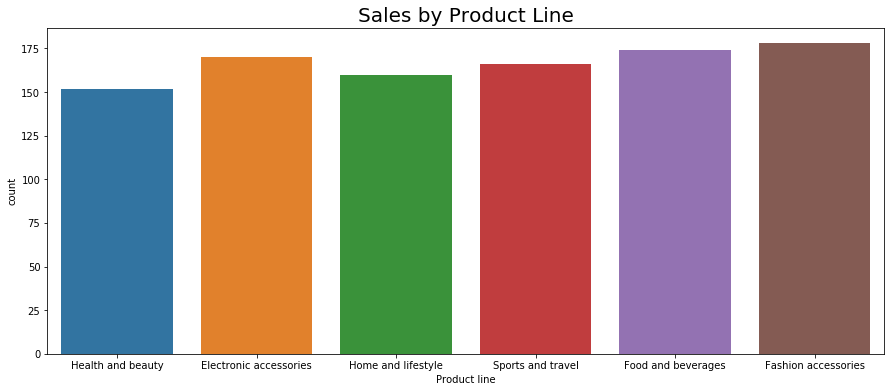

In [14]:
plt.figure(figsize=(15,6))
plt.title('Sales by Product Line',fontsize=20)
sns.countplot(df['Product line'])

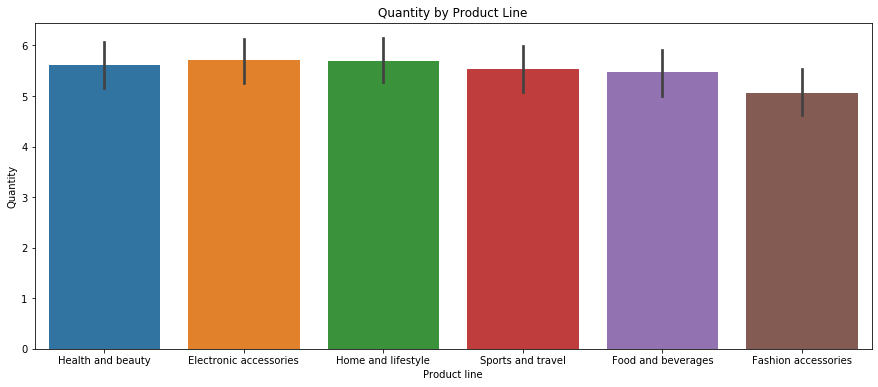

In [15]:
plt.figure(figsize=(15,6))
plt.title('Quantity by Product Line')
sns.barplot(x='Product line',y='Quantity',data=df)

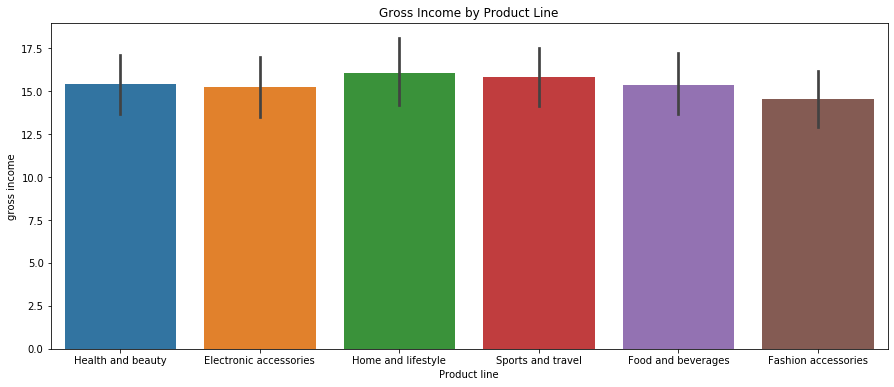

In [16]:
plt.figure(figsize=(15,6))
plt.title('Gross Income by Product Line')
sns.barplot(x='Product line',y='gross income',data=df)

Text(0, 0.5, 'Sales')

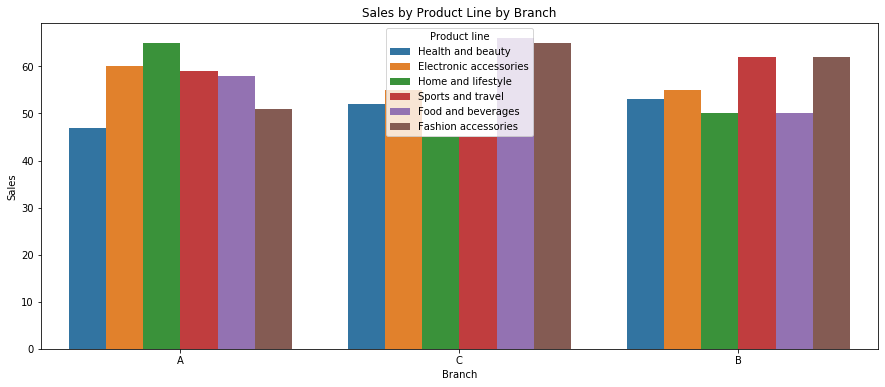

In [21]:
plt.figure(figsize=(15,6))
plt.title('Sales by Product Line by Branch')
sns.countplot(df['Branch'],hue=df['Product line'])

plt.ylabel('Sales')

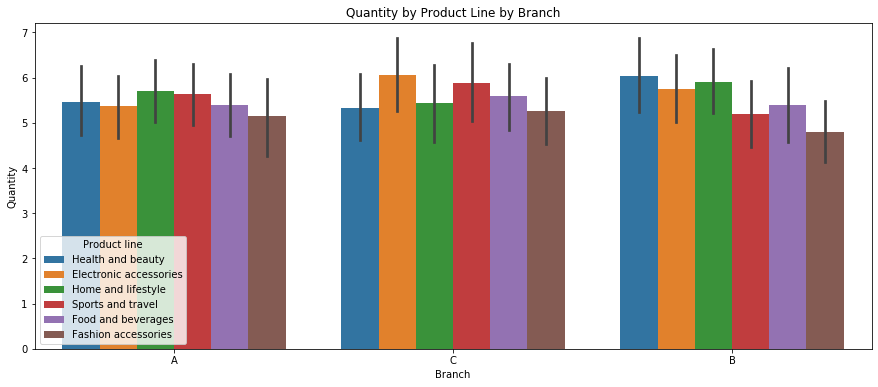

In [23]:
plt.figure(figsize=(15,6))
plt.title('Quantity by Product Line by Branch')
sns.barplot(x='Branch',y='Quantity',data=df,hue=df['Product line'])

Text(0, 0.5, 'Gross Income')

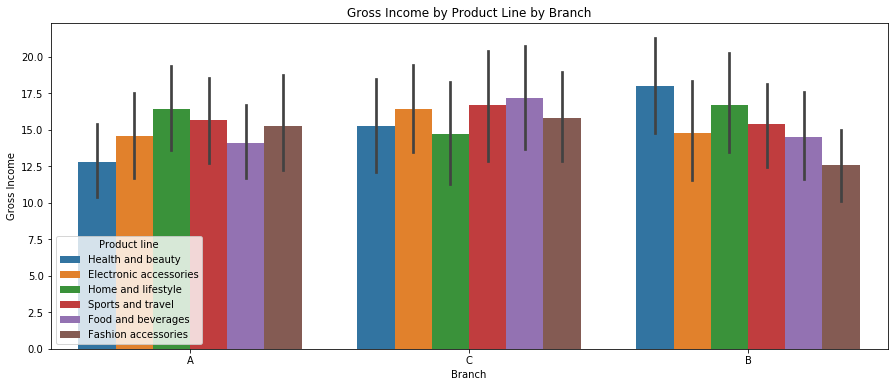

In [24]:
plt.figure(figsize=(15,6))
plt.title('Gross Income by Product Line by Branch')
sns.barplot(x='Branch',y='gross income',data=df,hue=df['Product line'])
plt.ylabel('Gross Income')

In [27]:
df.shape

(1000, 17)

In [30]:
branchAData=df.loc[df['Branch'] == 'A']
branchAData

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
6,355-53-5943,A,Yangon,Member,Female,Electronic accessories,68.84,6,20.6520,433.6920,2/25/2019,14:36,Ewallet,413.04,4.761905,20.6520,5.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,886-18-2897,A,Yangon,Normal,Female,Food and beverages,56.56,5,14.1400,296.9400,3/22/2019,19:06,Credit card,282.80,4.761905,14.1400,4.5
992,745-74-0715,A,Yangon,Normal,Male,Electronic accessories,58.03,2,5.8030,121.8630,3/10/2019,20:46,Ewallet,116.06,4.761905,5.8030,8.8
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


Text(0, 0.5, 'Gross Income')

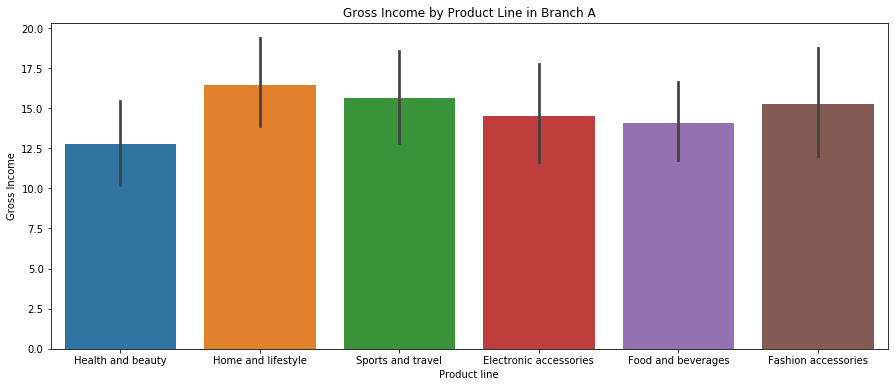

In [31]:
plt.figure(figsize=(15,6))
plt.title('Gross Income by Product Line in Branch A')
sns.barplot(x='Product line',y='gross income',data=branchAData)
plt.ylabel('Gross Income')


Text(0, 0.5, 'Gross Income')

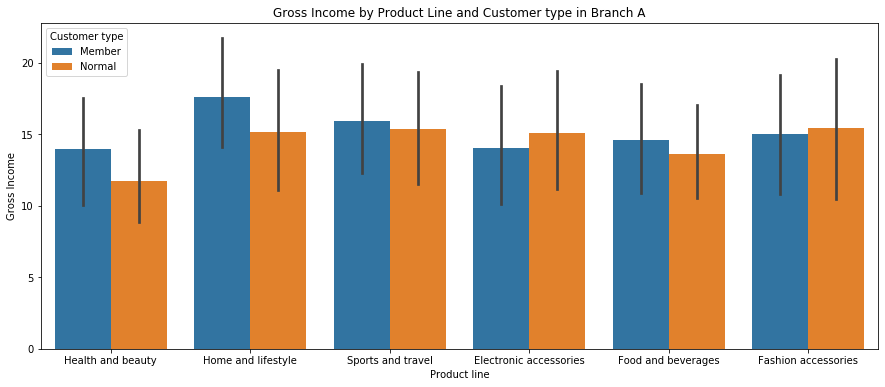

In [43]:
plt.figure(figsize=(15,6))
plt.title('Gross Income by Product Line and Customer type in Branch A')
sns.barplot(x='Product line',y='gross income',data=branchAData,hue=df['Customer type'])
plt.ylabel('Gross Income')

Text(0, 0.5, 'Gross Income')

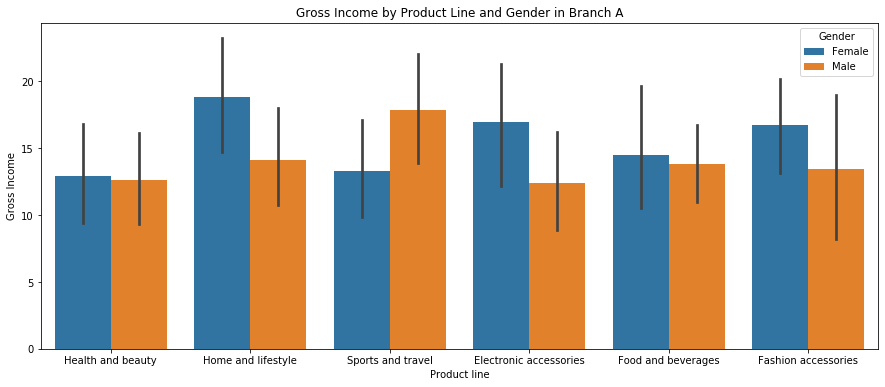

In [45]:
plt.figure(figsize=(15,6))
plt.title('Gross Income by Product Line and Gender in Branch A')
sns.barplot(x='Product line',y='gross income',data=branchAData,hue=df['Gender'])
plt.ylabel('Gross Income')

In [34]:
branchBData=df.loc[df['Branch']=='B']
branchBData

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
9,692-92-5582,B,Mandalay,Member,Female,Food and beverages,54.84,3,8.226,172.746,2/20/2019,13:27,Credit card,164.52,4.761905,8.226,5.9
10,351-62-0822,B,Mandalay,Member,Female,Fashion accessories,14.48,4,2.896,60.816,2/6/2019,18:07,Ewallet,57.92,4.761905,2.896,4.5
11,529-56-3974,B,Mandalay,Member,Male,Electronic accessories,25.51,4,5.102,107.142,3/9/2019,17:03,Cash,102.04,4.761905,5.102,6.8
15,299-46-1805,B,Mandalay,Member,Female,Sports and travel,93.72,6,28.116,590.436,1/15/2019,16:19,Cash,562.32,4.761905,28.116,4.5
19,319-50-3348,B,Mandalay,Normal,Female,Home and lifestyle,40.30,2,4.030,84.630,3/11/2019,15:30,Ewallet,80.60,4.761905,4.030,4.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
987,552-44-5977,B,Mandalay,Member,Male,Health and beauty,62.00,8,24.800,520.800,1/3/2019,19:08,Credit card,496.00,4.761905,24.800,6.2
989,430-53-4718,B,Mandalay,Member,Male,Health and beauty,75.37,8,30.148,633.108,1/28/2019,15:46,Credit card,602.96,4.761905,30.148,8.4
991,602-16-6955,B,Mandalay,Normal,Female,Sports and travel,76.60,10,38.300,804.300,1/24/2019,18:10,Ewallet,766.00,4.761905,38.300,6.0
993,690-01-6631,B,Mandalay,Normal,Male,Fashion accessories,17.49,10,8.745,183.645,2/22/2019,18:35,Ewallet,174.90,4.761905,8.745,6.6


Text(0, 0.5, 'Gross Income')

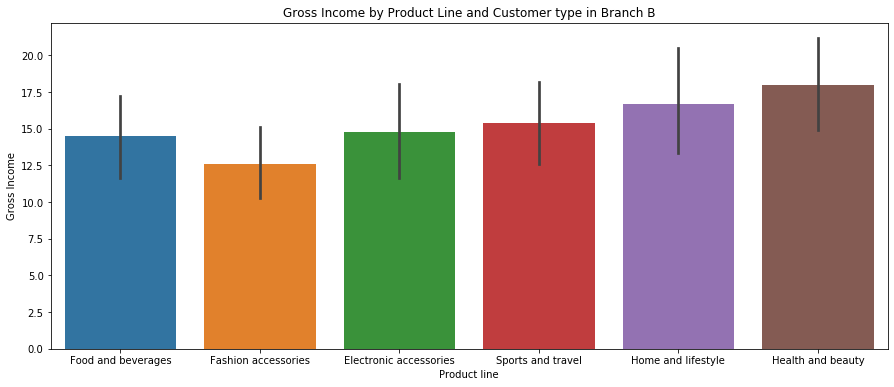

In [35]:
plt.figure(figsize=(15,6))
plt.title('Gross Income by Product Line and Customer type in Branch B')
sns.barplot(x='Product line',y='gross income',data=branchBData)
plt.ylabel('Gross Income')

Text(0, 0.5, 'Gross Income')

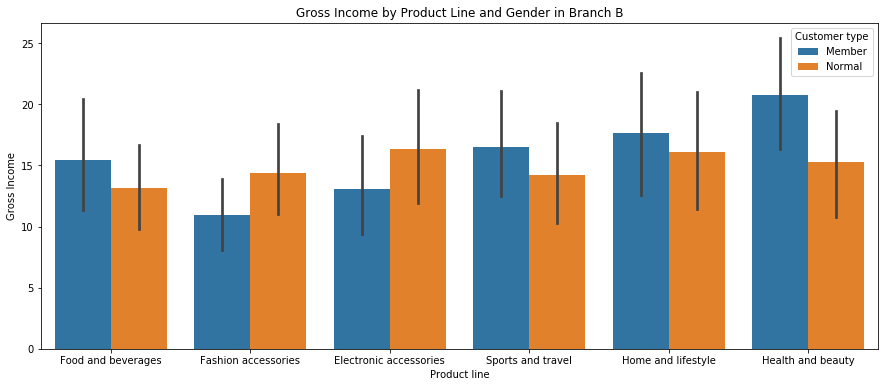

In [47]:
plt.figure(figsize=(15,6))
plt.title('Gross Income by Product Line and Gender in Branch B')
sns.barplot(x='Product line',y='gross income',data=branchBData,hue=df['Customer type'])
plt.ylabel('Gross Income')

In [37]:
branchCData=df.loc[df['Branch']=='C']
branchCData

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
5,699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,3/25/2019,18:30,Ewallet,597.73,4.761905,29.8865,4.1
7,315-22-5665,C,Naypyitaw,Normal,Female,Home and lifestyle,73.56,10,36.7800,772.3800,2/24/2019,11:38,Ewallet,735.60,4.761905,36.7800,8.0
20,300-71-4605,C,Naypyitaw,Member,Male,Electronic accessories,86.04,5,21.5100,451.7100,2/25/2019,11:24,Ewallet,430.20,4.761905,21.5100,4.8
34,183-56-6882,C,Naypyitaw,Member,Female,Food and beverages,99.42,4,19.8840,417.5640,2/6/2019,10:42,Ewallet,397.68,4.761905,19.8840,7.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
983,148-41-7930,C,Naypyitaw,Normal,Male,Health and beauty,99.96,7,34.9860,734.7060,1/23/2019,10:33,Cash,699.72,4.761905,34.9860,6.1
984,189-40-5216,C,Naypyitaw,Normal,Male,Electronic accessories,96.37,7,33.7295,708.3195,1/9/2019,11:40,Cash,674.59,4.761905,33.7295,6.0
988,267-62-7380,C,Naypyitaw,Member,Male,Electronic accessories,82.34,10,41.1700,864.5700,3/29/2019,19:12,Ewallet,823.40,4.761905,41.1700,4.3
994,652-49-6720,C,Naypyitaw,Member,Female,Electronic accessories,60.95,1,3.0475,63.9975,2/18/2019,11:40,Ewallet,60.95,4.761905,3.0475,5.9


Text(0, 0.5, 'Gross Income')

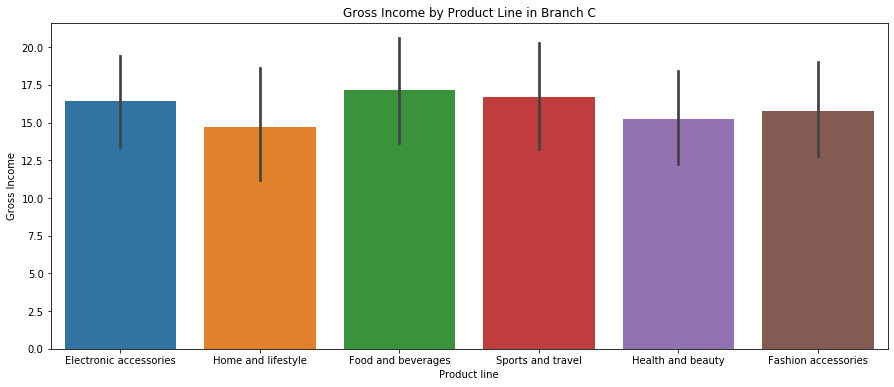

In [38]:
plt.figure(figsize=(15,6))
plt.title('Gross Income by Product Line in Branch C')
sns.barplot(x='Product line',y='gross income',data=branchCData)
plt.ylabel('Gross Income')

Text(0, 0.5, 'Gross Income')

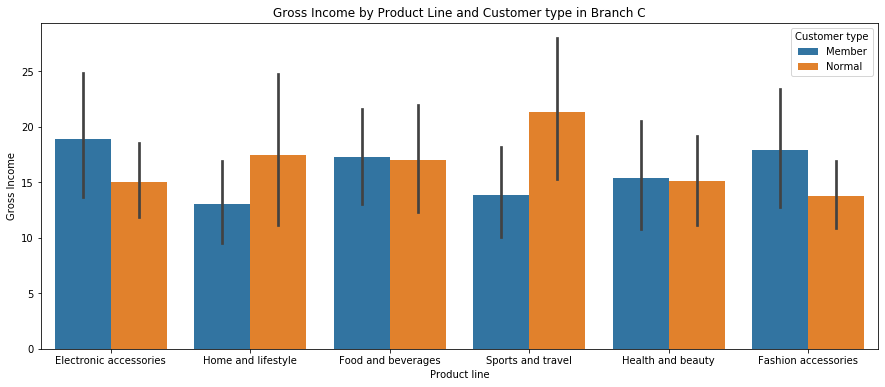

In [49]:
plt.figure(figsize=(15,6))
plt.title('Gross Income by Product Line and Customer type in Branch C')
sns.barplot(x='Product line',y='gross income',data=branchCData,hue=df['Customer type'])
plt.ylabel('Gross Income')

Text(0, 0.5, 'Gross Income')

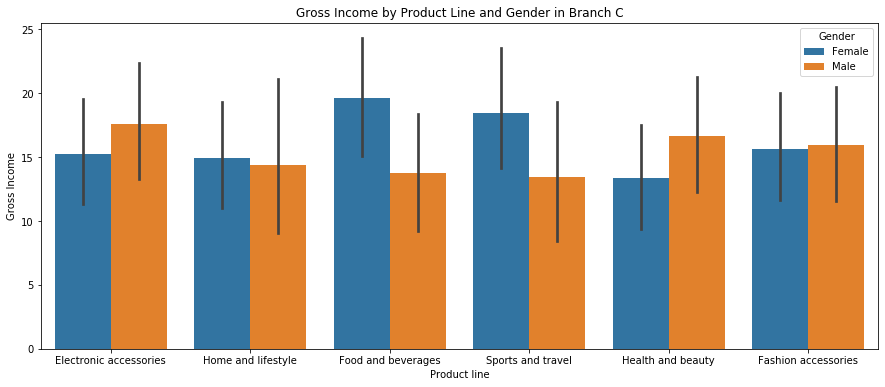

In [50]:
plt.figure(figsize=(15,6))
plt.title('Gross Income by Product Line and Gender in Branch C')
sns.barplot(x='Product line',y='gross income',data=branchCData,hue=df['Gender'])
plt.ylabel('Gross Income')

In [51]:
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


In [53]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [52]:
from sklearn.preprocessing import LabelEncoder

In [54]:
le=LabelEncoder()
df_col=('Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating')

In [55]:
for i in df_col:
    df[i]=le.fit_transform(df[i])

In [56]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,814,0,2,0,0,3,670,6,804,804,26,146,2,804,0,804,51
1,142,2,1,1,0,0,50,4,144,144,87,23,0,144,0,144,56
2,653,0,2,1,1,4,370,6,609,609,81,155,1,609,0,609,34
3,18,0,2,0,1,3,501,7,756,756,19,485,2,756,0,756,44
4,339,0,2,1,1,5,782,6,857,857,57,29,2,857,0,857,13


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Invoice ID               1000 non-null   int32
 1   Branch                   1000 non-null   int32
 2   City                     1000 non-null   int32
 3   Customer type            1000 non-null   int32
 4   Gender                   1000 non-null   int32
 5   Product line             1000 non-null   int32
 6   Unit price               1000 non-null   int64
 7   Quantity                 1000 non-null   int64
 8   Tax 5%                   1000 non-null   int64
 9   Total                    1000 non-null   int64
 10  Date                     1000 non-null   int32
 11  Time                     1000 non-null   int32
 12  Payment                  1000 non-null   int32
 13  cogs                     1000 non-null   int64
 14  gross margin percentage  1000 non-null   int64
 15  gross

In [58]:
import sweetviz as sv

In [59]:
data=sv.analyze(df)
data.show_html('Analyze.html')

                                             |          | [  0%]   00:00 -> (? left)

Report Analyze.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [60]:
from IPython.display import IFrame

In [61]:
IFrame(src='Analyze.html',width=1000,height=600)

In [64]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [65]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [67]:
mins=MinMaxScaler()
feat=['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating']
df[feat]=mins.fit_transform(df[feat])
df[feat]

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,0.814815,0.0,1.0,0.0,0.0,0.6,0.711253,0.666667,0.812942,0.812942,0.295455,0.289109,1.0,0.812942,0.0,0.812942,0.850000
1,0.142142,1.0,0.5,1.0,0.0,0.0,0.053079,0.444444,0.145602,0.145602,0.988636,0.045545,0.0,0.145602,0.0,0.145602,0.933333
2,0.653654,0.0,1.0,1.0,1.0,0.8,0.392781,0.666667,0.615774,0.615774,0.920455,0.306931,0.5,0.615774,0.0,0.615774,0.566667
3,0.018018,0.0,1.0,0.0,1.0,0.6,0.531847,0.777778,0.764408,0.764408,0.215909,0.960396,1.0,0.764408,0.0,0.764408,0.733333
4,0.339339,0.0,1.0,1.0,1.0,1.0,0.830149,0.666667,0.866532,0.866532,0.647727,0.057426,1.0,0.866532,0.0,0.866532,0.216667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.153153,1.0,0.5,1.0,1.0,0.6,0.333333,0.000000,0.054601,0.054601,0.238636,0.344554,1.0,0.054601,0.0,0.054601,0.366667
996,0.250250,0.5,0.0,1.0,0.0,0.8,0.955414,1.000000,0.995956,0.995956,0.795455,0.677228,1.0,0.995956,0.0,0.995956,0.066667
997,0.767768,0.0,1.0,0.0,1.0,0.4,0.239915,0.000000,0.037412,0.037412,0.659091,0.304950,0.0,0.037412,0.0,0.037412,0.616667
998,0.308308,0.0,1.0,1.0,1.0,0.8,0.605096,0.000000,0.104146,0.104146,0.511364,0.516832,0.0,0.104146,0.0,0.104146,0.016667


In [68]:
std=StandardScaler()
feat=['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating']
df[feat]=std.fit_transform(df[feat])
df[feat]

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,1.089461,-1.208970,1.210174,-0.998002,-0.998002,0.319617,0.734729,0.509930,1.085954,1.085954,-0.717956,-0.715515,1.203528,1.085954,0.0,1.085954,1.238443
1,-1.238417,1.238338,-0.009759,1.002002,-0.998002,-1.430109,-1.544504,-0.174540,-1.227921,-1.227921,1.638913,-1.552288,-1.205937,-1.227921,0.0,-1.227921,1.529527
2,0.531740,-1.208970,1.210174,1.002002,1.002002,0.902859,-0.368125,0.509930,0.402309,0.402309,1.407089,-0.654288,-0.001205,0.402309,0.0,0.402309,0.248760
3,-1.667966,-1.208970,1.210174,-0.998002,1.002002,0.319617,0.113454,0.852165,0.917672,0.917672,-0.988417,1.590711,1.203528,0.917672,0.0,0.917672,0.830927
4,-0.555989,-1.208970,1.210174,1.002002,1.002002,1.486101,1.146461,0.509930,1.271766,1.271766,0.479797,-1.511470,1.203528,1.271766,0.0,1.271766,-0.973790
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-1.200312,1.238338,-0.009759,1.002002,1.002002,0.319617,-0.573992,-1.543480,-1.543450,-1.543450,-0.911142,-0.525030,1.203528,-1.543450,0.0,-1.543450,-0.449840
996,-0.864294,0.014684,-1.229693,1.002002,-0.998002,0.902859,1.580251,1.536635,1.720517,1.720517,0.982080,0.617878,1.203528,1.720517,0.0,1.720517,-1.497741
997,0.926648,-1.208970,1.210174,-0.998002,1.002002,-0.263625,-0.897496,-1.543480,-1.603049,-1.603049,0.518434,-0.661091,-1.205937,-1.603049,0.0,-1.603049,0.423410
998,-0.663376,-1.208970,1.210174,1.002002,1.002002,0.902859,0.367111,-1.543480,-1.371662,-1.371662,0.016150,0.066833,-1.205937,-1.371662,0.0,-1.371662,-1.672391
